In [46]:
from CompilerQC import *
from CompilerQC import functions_for_database as database
import numpy as np
import random
from matplotlib import pyplot as plt
import networkx as nx

In [96]:
problem_folder = 'training_set'
for i, path in enumerate(database.get_files_to_problems(problem_folder, min_C=25, max_C=25)):
    if i > 5:
        break
    adj_matrix, qubit_to_coord_dict = database.problem_from_file(path)

In [111]:
graph_for_core = Graph.init_without_short_nodes(adj_matrix)
qbits_for_core = Qbits.init_qbits_from_dict(graph_for_core, dict())
nodes_object_for_core = Nodes(qbits_for_core)
polygon_object_for_core = Polygons(nodes_object_for_core,
                                   polygons=Polygons.create_polygons(graph_for_core.get_cycles(4))
                                  )
energy_for_core = Energy_core(polygon_object_for_core, scaling_for_plaq4=100)
mc_core = MC_core(energy_for_core)
mc_core.current_temperature = 10
mc_core.ancilla_deletion_probability = 0
mc_core.ancilla_insertion_probability = 0
mc_core.cluster_shuffling_probability = 0.9
mc_core.only_four_cycles_for_ancillas = True
# ignore qbits in core search which have short nodes
mc_core.energy.only_squares_in_core = True
mc_core.apply(2000)

105.78592000000003

In [112]:
core_qbit_to_core_dict, core_corner, ancillas_in_core = mc_core.energy.qbits_in_max_core()

In [113]:
ancillas = {}
while ancillas == {}:
    mc_core.apply(1)
    ancillas = mc_core.energy.polygon_object.nodes_object.propose_ancillas(5)
    print(ancillas)

ancillas

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{

KeyboardInterrupt: 

In [114]:
mc_core.add_ancillas(ancillas, only_four_cycles=mc_core.only_four_cycles_for_ancillas)

In [115]:
mc_core.energy.polygon_object.nodes_object.qbits.qubits

{(0, 1): <CompilerQC.qbits.Qbit at 0x7f1c832346d0>,
 (0, 2): <CompilerQC.qbits.Qbit at 0x7f1c83234ac0>,
 (1, 3): <CompilerQC.qbits.Qbit at 0x7f1c832349d0>,
 (1, 5): <CompilerQC.qbits.Qbit at 0x7f1c83234970>,
 (1, 8): <CompilerQC.qbits.Qbit at 0x7f1c83234af0>,
 (1, 12): <CompilerQC.qbits.Qbit at 0x7f1c83234b20>,
 (2, 3): <CompilerQC.qbits.Qbit at 0x7f1c83234b50>,
 (2, 5): <CompilerQC.qbits.Qbit at 0x7f1c83234bb0>,
 (2, 8): <CompilerQC.qbits.Qbit at 0x7f1c83234be0>,
 (2, 12): <CompilerQC.qbits.Qbit at 0x7f1c83234c10>,
 (3, 4): <CompilerQC.qbits.Qbit at 0x7f1c83234c40>,
 (3, 6): <CompilerQC.qbits.Qbit at 0x7f1c83234c70>,
 (4, 7): <CompilerQC.qbits.Qbit at 0x7f1c83234ca0>,
 (4, 9): <CompilerQC.qbits.Qbit at 0x7f1c83234cd0>,
 (4, 12): <CompilerQC.qbits.Qbit at 0x7f1c83234940>,
 (5, 10): <CompilerQC.qbits.Qbit at 0x7f1c83234d00>,
 (5, 11): <CompilerQC.qbits.Qbit at 0x7f1c832349a0>,
 (6, 7): <CompilerQC.qbits.Qbit at 0x7f1c83234d30>,
 (6, 12): <CompilerQC.qbits.Qbit at 0x7f1c83234d60>,
 (7, 9

In [117]:
mc_core.apply(100)

687.66587

In [118]:
core_qbit_to_core_dict, core_corner, ancillas_in_core = mc_core.energy.qbits_in_max_core()
ancillas_in_core

{}

In [80]:
graph = Graph(adj_matrix)
len(graph.qubits)

51

In [119]:
graph = Graph(adj_matrix=adj_matrix)

qbits = Qbits.init_qbits_from_dict(graph, dict())
nodes_object = Nodes(qbits, place_qbits_in_lines=False)

polygon_object = Polygons(nodes_object)
polygon_object.core_corner = core_corner
energy = Energy(polygon_object, scaling_for_plaq3=1000, scaling_for_plaq4=1000)
mc = MC(energy)
mc.update_qbits_from_dict(core_qbit_to_core_dict, assign_to_core=True)
mc.add_ancillas(ancillas_in_core)

In [120]:
mc.shell_search = False
# mc.same_node_coords = True
mc.random_qbit = True
mc.finite_grid_size=True
mc.current_temperature = 10
mc.n_total_steps = 0
mc.min_plaquette_density_in_softcore = 0.9
mc.swap_probability = 0
mc.qbit_with_same_node_around_core = False
mc.shell_search_around_core = False

In [121]:
mc.apply(5000)

2006.96331

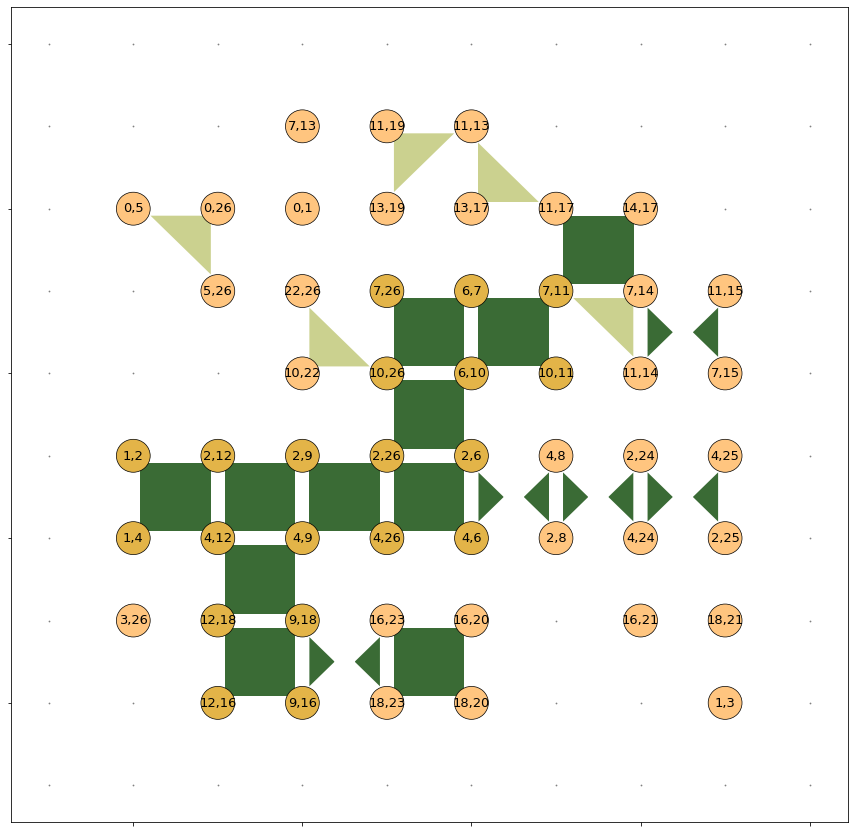

In [122]:
_, ax = plt.subplots(figsize=(15,15))
# x, y = list(zip(*list(set(coords_around_core) - set(qbits.core_qbit_coords))))
# ax.scatter(x, y, color="red", s=2500)
mc.energy.polygon_object.visualize(ax=ax)
plt.show()

In [123]:
graph.C

25